<a href="https://colab.research.google.com/github/thirumalvenkat/GCPSamples/blob/master/Project1_Computer_Vision_CNN_Thiru_20200401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Differentiate a weed from a crop seedling based on CNN approach**

---


### **Model designed and built by Thirumalvalavan V**

##01 Install required software to download the dataset from Kaggle

In [0]:
%tensorflow_version 2.x

# 02 - As Kaggle Download has issues as it limits the number of files downloaded and not entire Zip, Downloaded to Google drive and mounted it

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!target_path='/content/gdrive/My Drive/plantseed'

# 03 - Unzip the files 

In [0]:
import os
#!unzip /content/gdrive/My\ Drive/plantseed/plant-seedlings-classification.zip
os.chdir('/content/gdrive/My Drive/plantseed')  #change dir

# 04 - View the sample pictures and understand the characteristics and the type of folder structure etc.

In [0]:
train_dir='/content/gdrive/My\ Drive/plantseed'

In [41]:
!ls -l $train_dir/train
!ls $train_dir/test | wc

total 48
drwx------ 2 root root 4096 Apr  1 06:37  Black-grass
drwx------ 2 root root 4096 Apr  1 06:37  Charlock
drwx------ 2 root root 4096 Apr  1 06:37  Cleavers
drwx------ 2 root root 4096 Apr  1 06:37 'Common Chickweed'
drwx------ 2 root root 4096 Apr  1 06:37 'Common wheat'
drwx------ 2 root root 4096 Apr  1 06:37 'Fat Hen'
drwx------ 2 root root 4096 Apr  1 06:37 'Loose Silky-bent'
drwx------ 2 root root 4096 Apr  1 06:37  Maize
drwx------ 2 root root 4096 Apr  1 06:38 'Scentless Mayweed'
drwx------ 2 root root 4096 Apr  1 06:38 'Shepherds Purse'
drwx------ 2 root root 4096 Apr  1 06:38 'Small-flowered Cranesbill'
drwx------ 2 root root 4096 Apr  1 06:38 'Sugar beet'
    794     794   11116


In [0]:
import tensorflow as tf
from tensorflow import keras

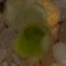

In [43]:
#Load an image using Keras image class
image_file = '/content/gdrive/My Drive/plantseed/train/Maize/0419f5bbc.png'
Maize_image = keras.preprocessing.image.load_img(image_file)
#Inspect image
Maize_image

In [44]:
Maize_image.size

(66, 66)

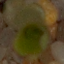

In [45]:
Maize_image.resize([64,64])

# 05 - Image Generator to process the pictures

In [0]:
img_generator= keras.preprocessing.image.ImageDataGenerator(validation_split=0.3)

In [0]:
photos_path = '/content/gdrive/My Drive/plantseed/train/'
photos_path_test = '/content/gdrive/My Drive/plantseed/test'

In [0]:
image_size=56
batch_s=32

In [49]:
#Build training generator. 
train_generator = img_generator.flow_from_directory(photos_path,
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    batch_size=batch_s,
                                                    class_mode="categorical",
                                                    shuffle=True)

Found 3330 images belonging to 12 classes.


In [50]:
#Build training generator. 
valid_generator = img_generator.flow_from_directory(photos_path,
                                                    target_size=(image_size, image_size),
                                                    subset='validation',
                                                    batch_size=batch_s,
                                                    class_mode="categorical",
                                                    shuffle=True
                                                   )

Found 1420 images belonging to 12 classes.


In [51]:
#Lets check the features (images) and Labels (plant seed class) returned by ImageDataGenerator
train_images, train_labels = next(train_generator)
print('Input features shape', train_images.shape)
print('Actual labels shape', train_labels.shape)

Input features shape (32, 56, 56, 3)
Actual labels shape (32, 12)


In [52]:
#Lets check the features (images) and Labels (plant seed class) returned by ImageDataGenerator
valid_images, valid_labels = next(valid_generator)
print('Input features shape', valid_images.shape)
print('Actual labels shape', valid_labels.shape)

Input features shape (32, 56, 56, 3)
Actual labels shape (32, 12)


## 06 Model Build

In [0]:
keras.backend.clear_session()

In [0]:
plantseed_cnn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(image_size, image_size, 3)),
    keras.layers.Conv2D(128, 
                                 kernel_size=(3,3), 
                                 activation='relu',padding="same"),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, 
                                kernel_size=(3,3), 
                                activation='relu',padding="same"),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding="same"),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding="same"),   
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding="same"),
    keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding="same"), 
    keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)), 
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])

In [0]:
#Specify Loass and Optimizer
plantseed_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/plantseed/plant_seedling_20200401.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [57]:
plantseed_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 56, 56, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [0]:
#plantseed_cnn_model.fit_generator(train_generator, 
#                          epochs=20,
#                          steps_per_epoch= 3330/32,  #Number of training images//batch_size
#                          validation_data=valid_generator,
#                          validation_steps = 1420/32,
#                          callbacks = [model_checkpoint]) #Number of validation images//batch_size

In [0]:
#plantseed_cnn_model.save('plant_seed_cnn_v1.h5')

## 10 - Final Prediction on Test Data

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from glob import glob
import cv2
from glob import glob
from matplotlib import pyplot as plt
import math
import pandas as pd
from sklearn import preprocessing

In [0]:
# path to model
model_path = '/content/gdrive/My Drive/plantseed/plant_seed_cnn_v1.h5'

In [0]:
# load the trained model
plantseed_cnn_model.load_weights(filepath=model_path)

In [96]:
path = '/content/gdrive/My Drive/plantseed/train/*/*.png' 
files = glob(path)

trainLabel = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
    j += 1

trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [97]:
#Print all classes
le = preprocessing.LabelEncoder()
le.fit(trainLabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


(794, 56, 56, 3)


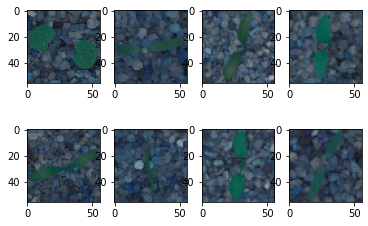

In [85]:
#Load Test Images
path = '/content/gdrive/My Drive/plantseed/test/*.png'
files = glob(path)

testImg = []
testId = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print("Obtain images: " + str(j) + "/" + str(num), end='\r')
    testId.append(img.split('/')[-1])  # Images id's
    testImg.append(cv2.resize(cv2.imread(img), (image_size, image_size)))
    j += 1

testImg = np.asarray(testImg)  # Train images set

print(testImg.shape)

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(testImg[i])

In [0]:
pred = plantseed_cnn_model.predict(testImg)

In [0]:
# Write result to file
predNum = np.argmax(pred, axis=1)
predStr = le.classes_[predNum]

res = {'file': testId, 'species': predStr}
res = pd.DataFrame(res)
res.to_csv("res.csv", index=False)

## After Uploading to Kaggle. Ranking in Kaggle is 0.184 Rank ~800